# Reputation
## Twitter

In [2]:
import pandas as pd
import json

with open('../data/twitter.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data.values())[
    ['cap.universal', 'user.user_data.followers_count', 'user.user_data.verified']].rename(
    columns={'cap.universal': 'cap_universal', 'user.user_data.followers_count': 'followers_count',
             'user.user_data.verified': 'verified'})

df.head()

,cap_universal,followers_count,verified
0,0.760578,2628300,True
1,0.808228,47650,False
2,0.752712,35127,False
3,0.743721,25007,False
4,0.792437,1692856,True


In [19]:
# accept a value and dict describing bins: { 'bin_name': (min, max) }
# return the bin name
def get_followers_bin(x, bins):
    for bin_value, (m, M) in bins.items():
        if m <= x < M:
            return bin_value
    return 4

BIN_NAMES = {
    1: 'unrated',
    2: 'bronze',
    3: 'silver',
    4: 'gold'
}

FOLLOWERS_BINS = {
    1: (0, 3000),
    2: (3000, 46000),
    3: (46000, 1600000)
}


def reputation(cap, followers, verified):
    if cap >= 0.95:
        return 'unrated'

    followers_bin = get_followers_bin(followers, FOLLOWERS_BINS)

    return BIN_NAMES[max(followers_bin, 2)] if verified else BIN_NAMES[followers_bin]

In [20]:
df['reputation'] = df.apply(lambda x: reputation(x['cap_universal'], x['followers_count'], x['verified']), axis=1)
df.head()

,cap_universal,followers_count,verified,reputation
0,0.760578,2628300,True,gold
1,0.808228,47650,False,silver
2,0.752712,35127,False,bronze
3,0.743721,25007,False,bronze
4,0.792437,1692856,True,gold


In [21]:
df['reputation'].value_counts()

unrated    811
bronze      87
silver       8
gold         2
Name: reputation, dtype: int64

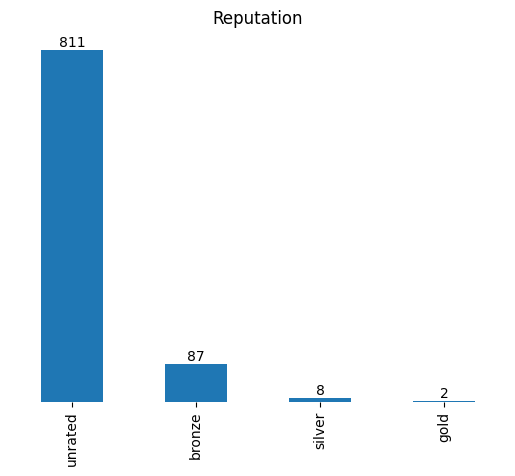

In [24]:
# draw bar chart of reputation column
# display the count of each value at the top of each bar
# don't show y-axis
plt = df['reputation'].value_counts().plot.bar(title='Reputation')
plt.axes.get_yaxis().set_visible(False)
plt.bar_label(plt.containers[0])

# hide frame
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# save plot
plt.figure.savefig('../plots/reputation.png', bbox_inches='tight')